In [ ]:
#importando bibliotecas
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#inicializando o dataset
iris = datasets.load_iris()

In [ ]:
#imprimindo dados do dataset
print(iris.data.shape)
print(iris.target_names)
print(iris.feature_names)

(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#divisão de dados
X_train, X_test,  y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.15, random_state=44)

Os dados foram divididos em quatro variáveis diferentes:



*   X_train: Contém as características das amostras que serão usadas para treinar o modelo.
*   X_test: Contém as características das amostras que serão usadas para testar o modelo (avaliar o desempenho do modelo).
*   y_train: Contém os rótulos correspondentes às amostras em X_train. Estes são usados durante o treinamento para ensinar o modelo.
*   y_test: Contém os rótulos correspondentes às amostras em X_test. Estes são usados para avaliar quão bem o modelo está generalizando para dados não vistos durante o treinamento.

In [ ]:
#treinamento do modelo
clf=neighbors.KNeighborsClassifier(n_neighbors=30, metric="manhattan")
clf.fit(X_train, y_train);
#ajustando dados
result = clf.predict(X_test)
print('Acurácia do modelo: ' , (accuracy_score(y_test, result))*100, '%')

Acurácia do modelo:  100.0 %




*   O objeto de classificação é criado
*   Definição do número de vizinhos que serão considerados no algoritmo
*   O modelo é treinado
*   O modelo treinado é usado para fazer previsões sobre os dados de teste
*   A acurácia do modelo é calculada







In [ ]:
#previsões nos valores de x
print("Predict")
print(result)

Predict
[2 0 1 1 2 0 2 2 2 1 0 1 0 2 0 0 2 1 0 2 1 2 2 1 2 1 0 1 0 1 0 1 1 2 0 1 0
 0 2 1 0 0 2 0 0 2 0 2 1 1]


Exibição das previsões feitas pelo modelo

In [ ]:
print("Validacao cruzada - porcentagem")
print(cross_val_score(clf, X_train, y_train, cv=5))

Validacao cruzada - porcentagem
[0.85 0.95 0.9  0.95 1.  ]


Avalia o modelo usando validação cruzada, dividindo os dados em 5 dobras e cada uma é usada como teste.

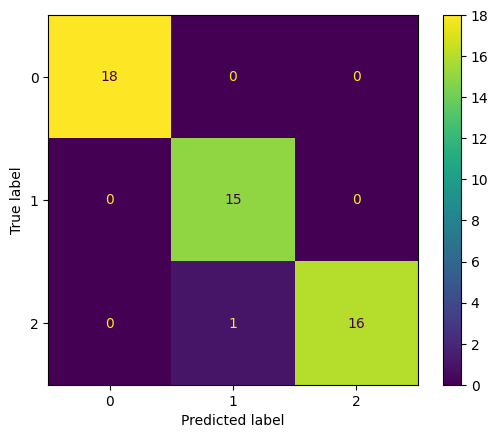

In [ ]:
#matriz confusão
cm = confusion_matrix(y_test, result, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Aqui é utilizado o sklearn para calcular a matriz confusão.
A matriz de confusão é uma tabela para descrever o desempenho de um modelo

In [ ]:

print("Metricas gerais")
print(classification_report(y_test, result))


Metricas gerais
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Precison: a precisão mede a precisão do modelo ao prever positivos.
Recall: o recall mede a capacidade do modelo de encontrar todas as instâncias positivas.
f1-score: Ele fornece um equilíbrio entre precisão e recall, sendo útil quando as classes estão desbalanceadas.
accuracy: A acurácia é a proporção de todas as previsões corretas em relação ao número total de amostras. É uma medida geral da precisão do modelo.
macro avg: A média macro é a média das métricas (precisão, recall e F1-score) calculadas para cada classe individualmente.
weighted avg: A média ponderada é a média das métricas, onde cada classe é ponderada pelo seu suporte (número de ocorrências reais da classe). É útil quando você tem classes desbalanceadas e deseja dar mais peso às classes com mais exemplos.